In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path="C:/Users/Admin/DataScienceAssignment/heart_disease.xlsx"
df=pd.read_excel(file_path,sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
DF=pd.read_excel(file_path,sheet_name=None)
DF.keys()

dict_keys(['Description', 'Heart_disease'])

In [4]:
Df=pd.read_excel(file_path,sheet_name='Description')
Df


,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [5]:
df.shape

(908, 13)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [9]:
#checking categorical columns
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [10]:
# Convert the 'fbs' column (boolean) to integer
df['fbs'] = df['fbs'].astype(int)

# Verify the conversion
print(df['fbs'].dtype)  # Should print 'int64'


int32


In [11]:
print(df['exang'].unique())


[False True 'FALSE' 'TURE']


In [12]:
df['exang'] = df['exang'].replace({'TURE': 'TRUE'})  # Fix typo

In [13]:
df['exang'] = df['exang'].map({False: False, True: True, 'FALSE': False, 'TRUE': True})

In [14]:
print(df['exang'].unique())


[False  True]


In [15]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [16]:
#checking numerical columns
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'num']

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all object columns
object_columns = ['sex', 'cp', 'restecg', 'slope', 'thal','exang']
for col in object_columns:
    df[col] = le.fit_transform(df[col])

# Handle missing values in 'oldpeak' (if needed)
#df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

# Check the final data types
print(df.dtypes)


age           int64
sex           int32
cp            int32
trestbps      int64
chol          int64
fbs           int32
restecg       int32
thalch        int64
exang         int64
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object


In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,NaN,0,0,4


In [19]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [20]:
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [21]:
#checking numerical columns
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [22]:
#checking  duplicates
df.duplicated().sum()

1

In [23]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,1,2,150,219,0,2,118,1,0.0,0,1,2


In [24]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(907, 13)

In [25]:
#filling the missing values using forward fill (ffill)
df.fillna(method='ffill',inplace=True)
df.ffill(inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\525318147.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,53.787211,0.790518,0.776185,133.412348,201.465270,0.203969,0.990077,135.976847,0.410143,0.866593,1.156560,1.187431,1.007718
std,9.162016,0.407163,0.958041,20.405432,112.158285,0.403169,0.634643,26.813075,0.492131,1.085199,0.690337,0.735520,1.144594
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.500000,1.000000,0.000000,120.000000,176.500000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,0.000000,0.500000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

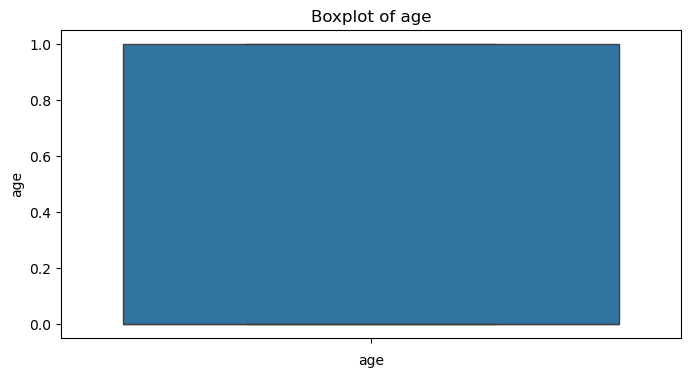

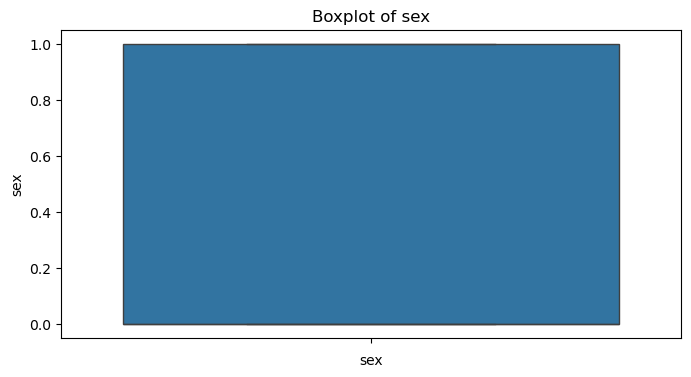

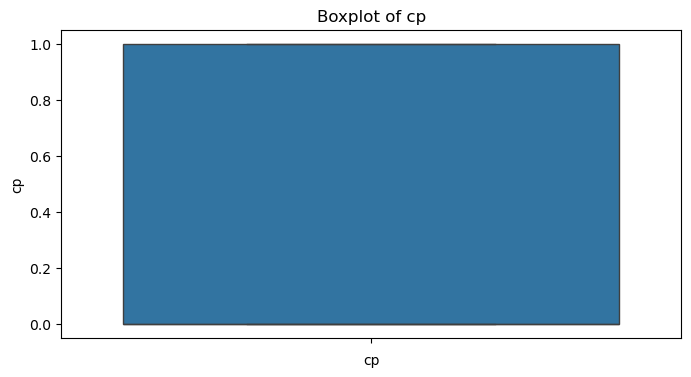

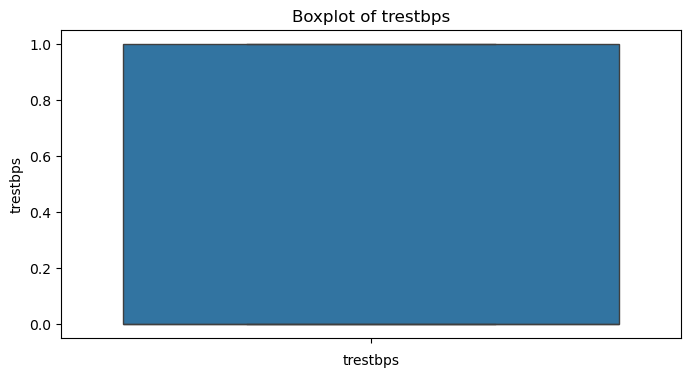

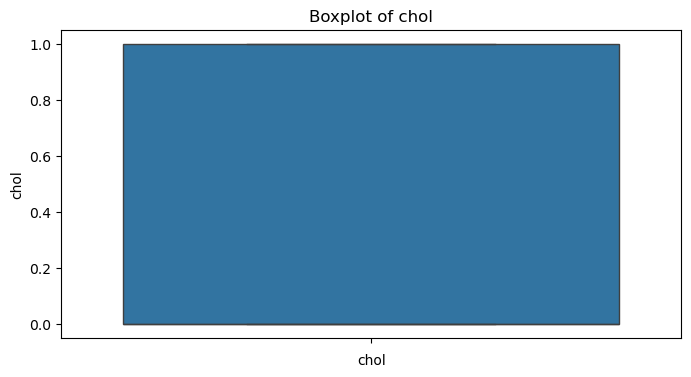

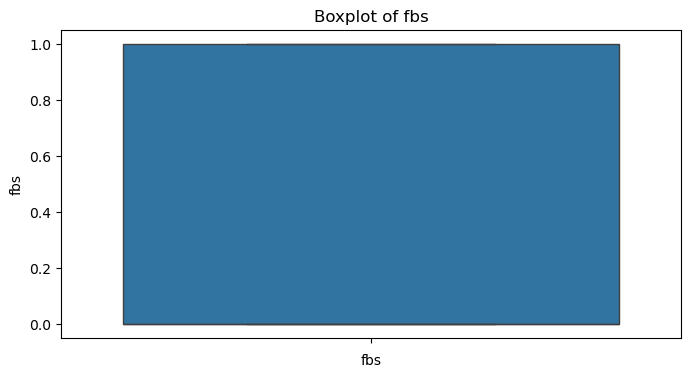

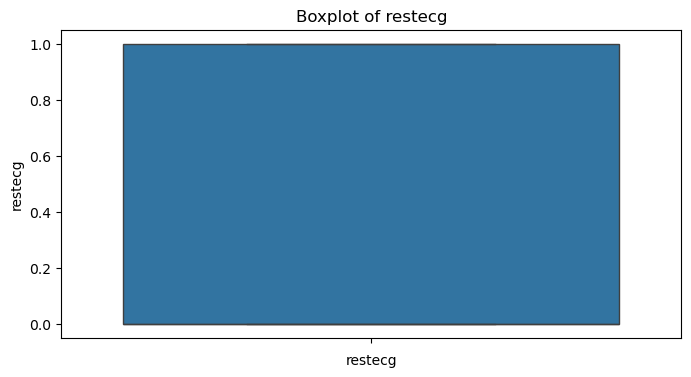

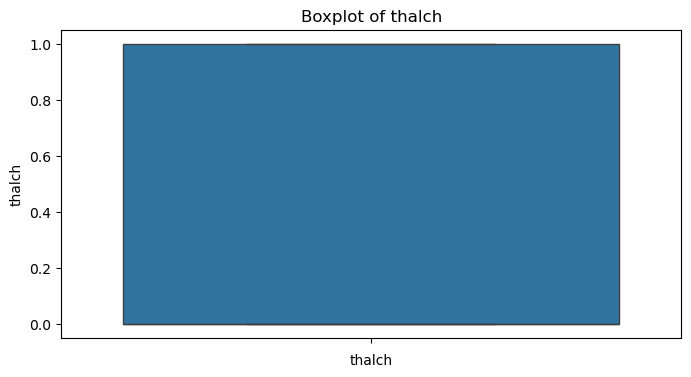

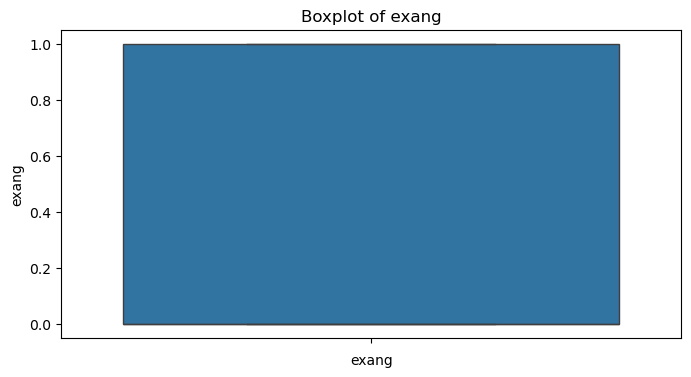

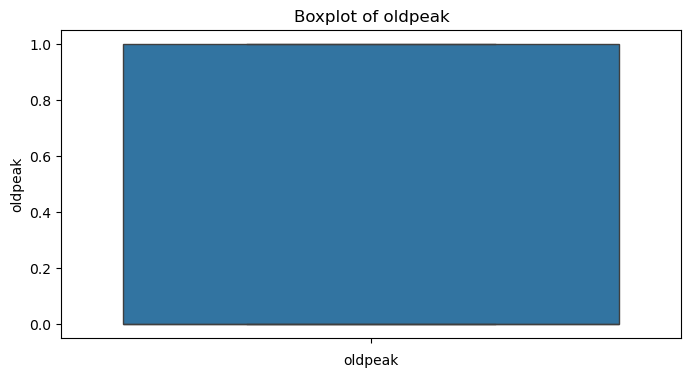

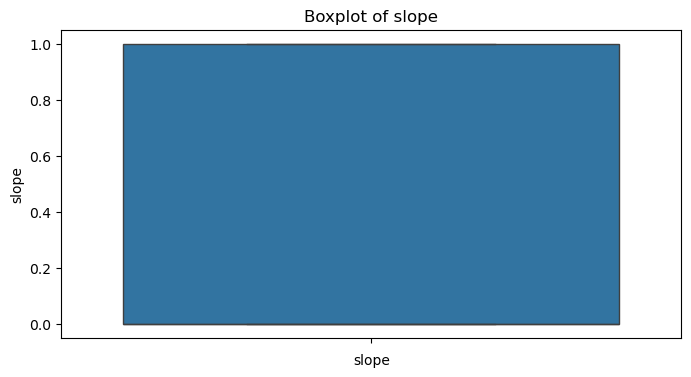

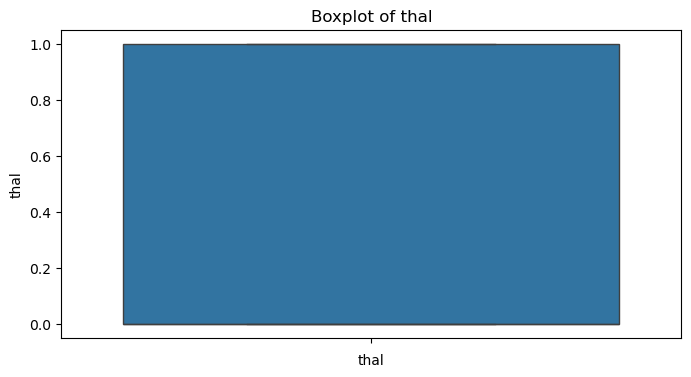

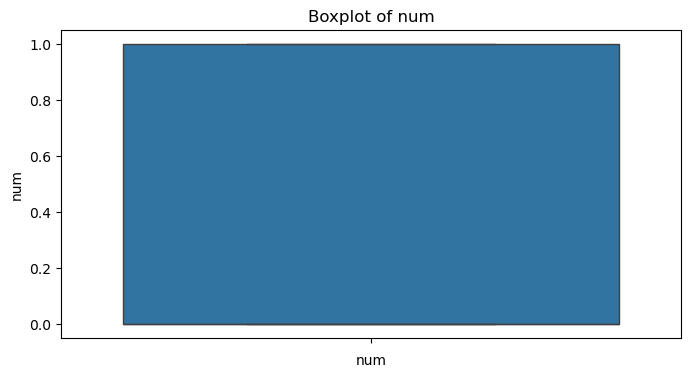

In [29]:
#checking outliers using boxplot
for num_col in df:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {num_col}')
    plt.ylabel(num_col)
    plt.xlabel(num_col)
    plt.show()

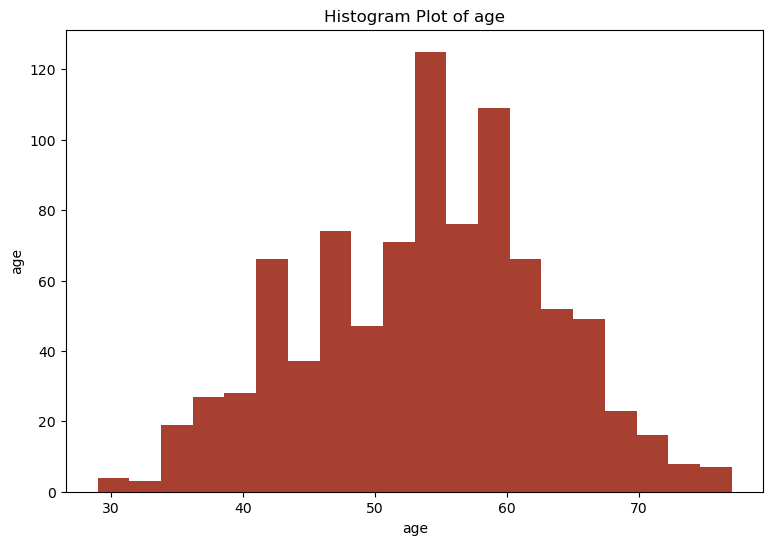

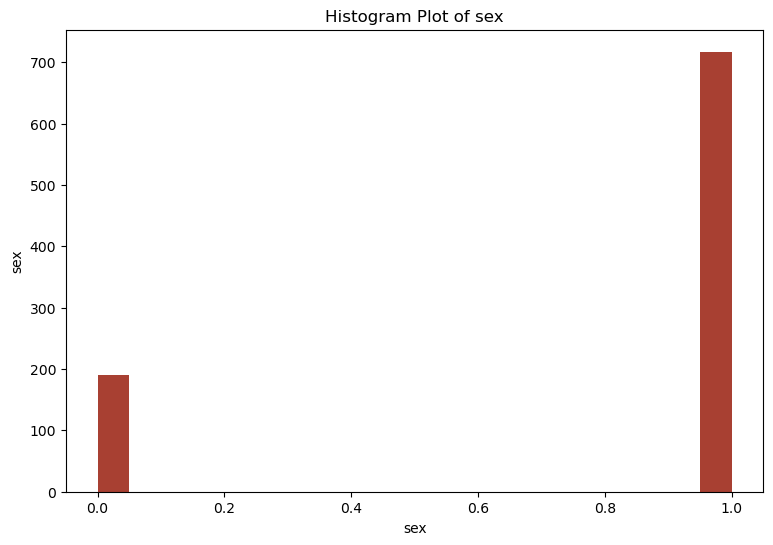

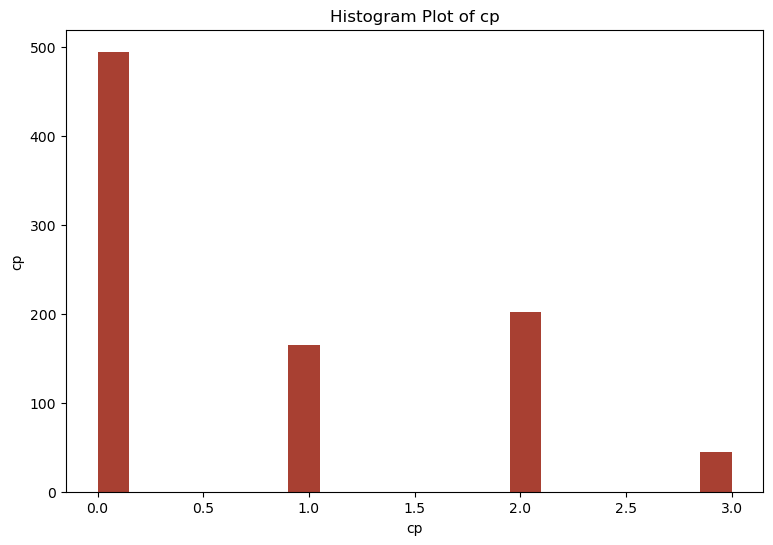

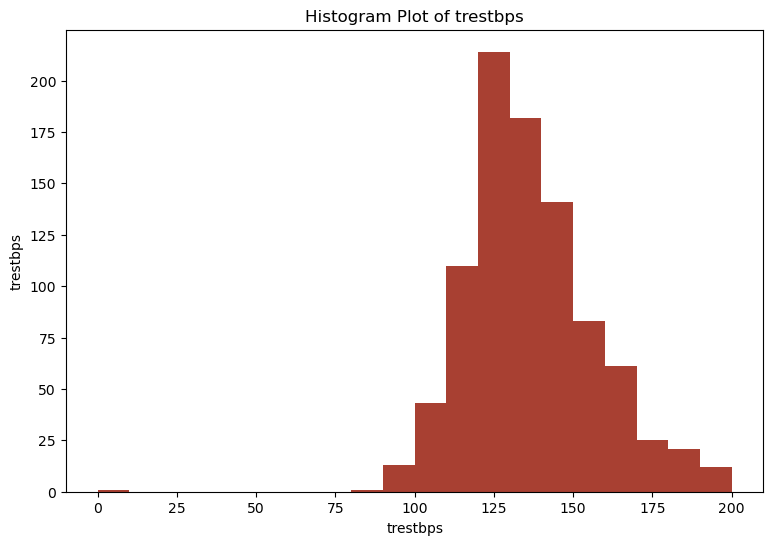

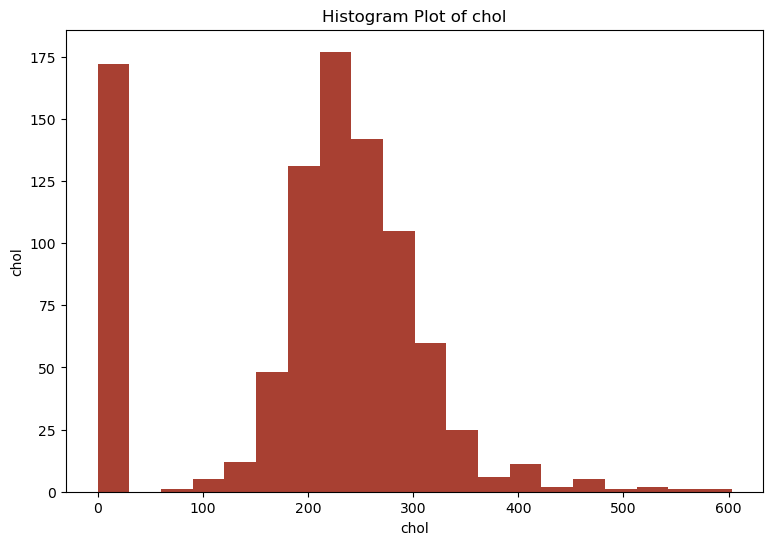

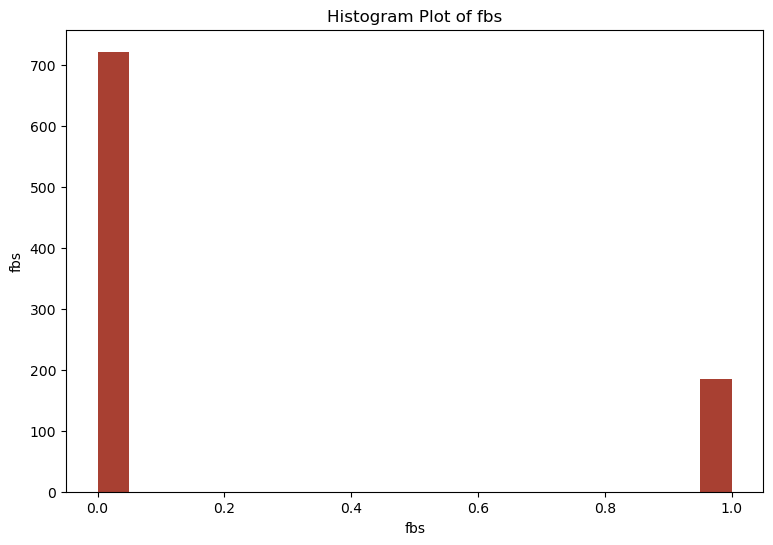

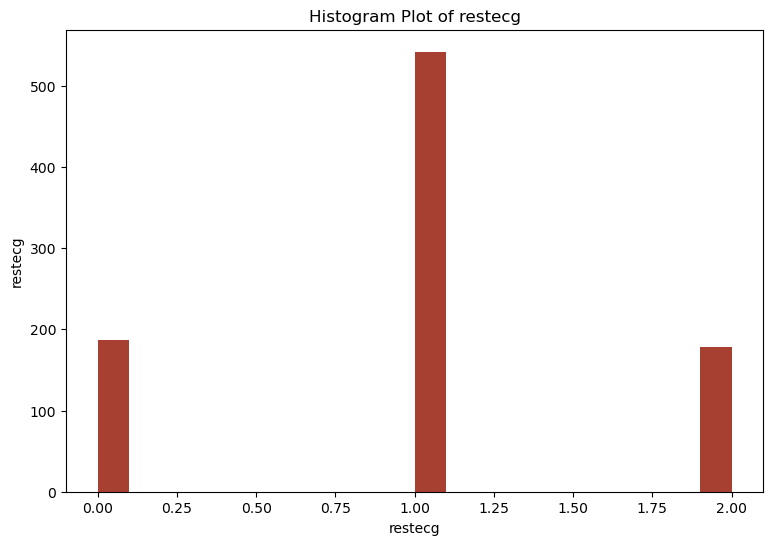

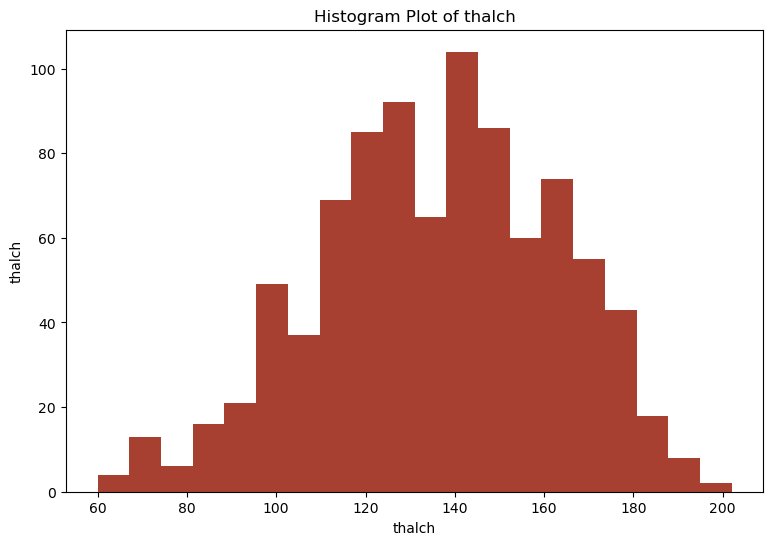

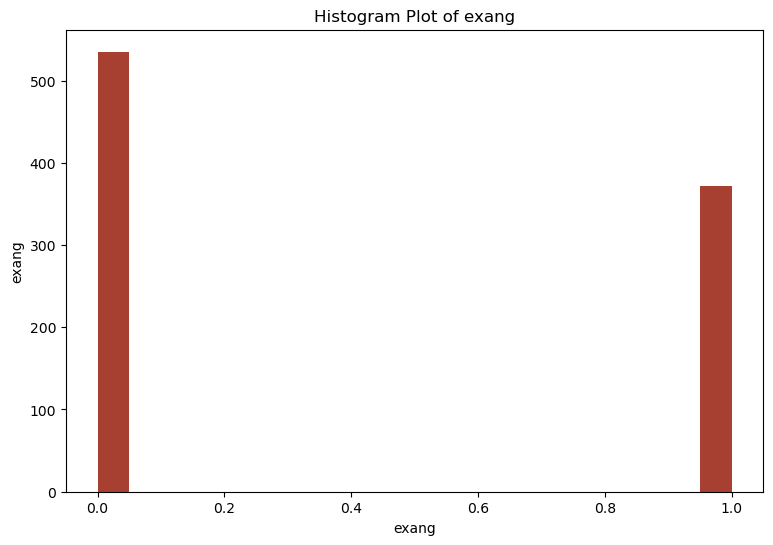

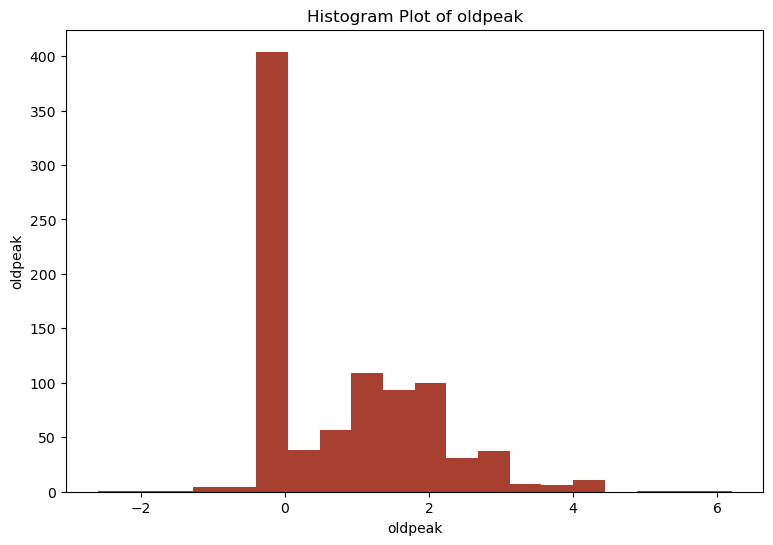

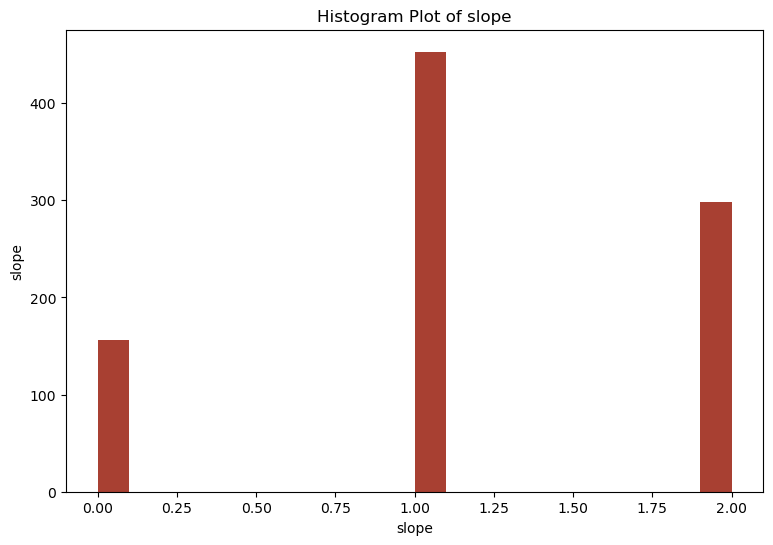

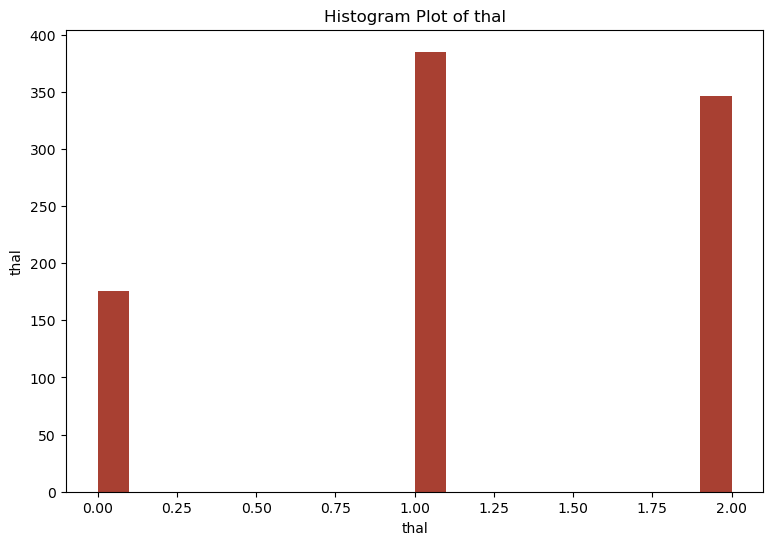

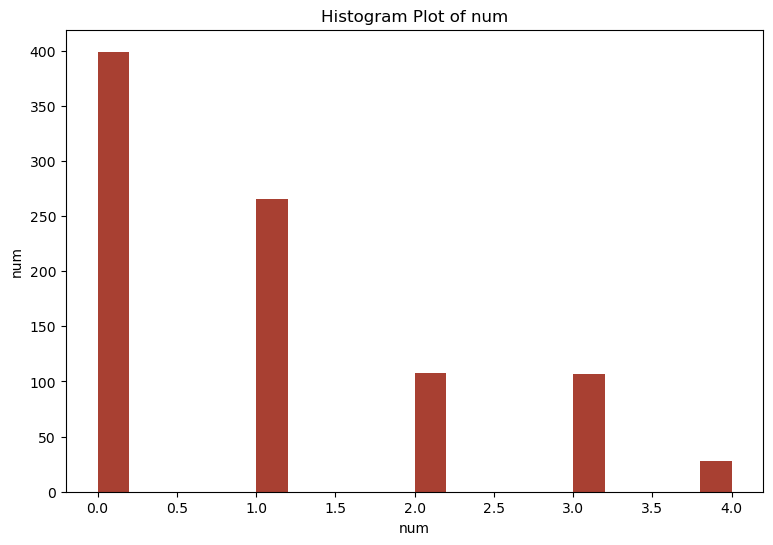

In [30]:
for num_col in df:
    plt.figure(figsize=(9,6))
    plt.hist(df[num_col],bins=20, color='#a84032')
    plt.title(f'Histogram Plot of {num_col}')
    plt.xlabel(num_col)
    plt.ylabel(num_col)
    plt.show()
    

In [31]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.051947,-0.068305,0.253709,-0.100059,0.177004,-0.008336,-0.327868,0.192202,0.218034,-0.053886,0.058829,0.326227
sex,0.051947,1.000000,-0.125986,0.015988,-0.191632,0.092480,0.077376,-0.178484,0.186884,0.089061,-0.044191,0.068596,0.259258
cp,-0.068305,-0.125986,1.000000,0.007944,0.071005,-0.044562,-0.074455,0.249440,-0.345866,-0.169631,0.094762,-0.079809,-0.314480
trestbps,0.253709,0.015988,0.007944,1.000000,0.117392,0.112124,0.056824,-0.132841,0.151086,0.144668,0.008262,0.056620,0.136581
chol,-0.100059,-0.191632,0.071005,0.117392,1.000000,-0.113651,-0.195021,0.198074,-0.037256,0.047599,0.047655,-0.016900,-0.239065
fbs,0.177004,0.092480,-0.044562,0.112124,-0.113651,1.000000,0.068311,-0.065827,0.028502,0.009537,-0.027616,-0.017400,0.156839
restecg,-0.008336,0.077376,-0.074455,0.056824,-0.195021,0.068311,1.000000,-0.194343,0.083724,-0.045195,-0.082107,-0.111874,0.035053
thalch,-0.327868,-0.178484,0.249440,-0.132841,0.198074,-0.065827,-0.194343,1.000000,-0.348668,-0.118791,0.223212,0.005985,-0.322632
exang,0.192202,0.186884,-0.345866,0.151086,-0.037256,0.028502,0.083724,-0.348668,1.000000,0.344372,-0.159975,0.086220,0.358837
oldpeak,0.218034,0.089061,-0.169631,0.144668,0.047599,0.009537,-0.045195,-0.118791,0.344372,1.000000,-0.181450,0.086260,0.444157


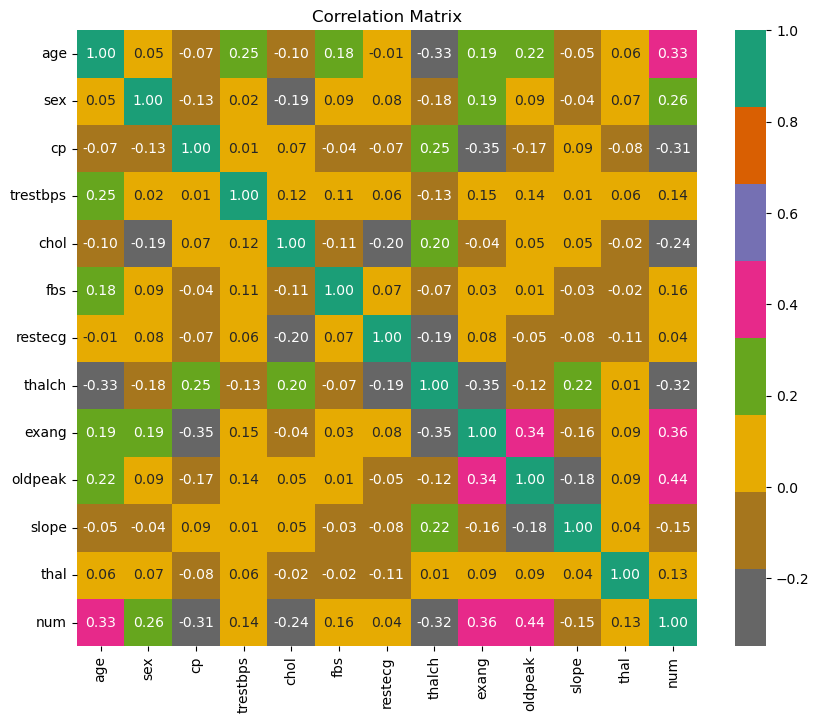

In [32]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=plt.cm.Dark2_r, cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age','trestbps', 'chol','thalch','oldpeak']] = scaler.fit_transform(df[['age','trestbps', 'chol','thalch','oldpeak']])
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.321598,0,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-0.798997,1,0,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-0.430198,1,0,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-0.798997,1,0,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,0.584000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,0.584000,2,2,4
904,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,1.966997,1,2,4
905,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.505998,0,1,4
906,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,1,1.505998,0,0,4


## Split the Data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.iloc[:,:12]
y = df.iloc[:,12]
X.shape,y.shape

((907, 12), (907,))

In [36]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.321598,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-0.798997,1,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-0.430198,1,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-0.798997,1,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,0.584000,1,0


In [37]:
y.tail()

903    4
904    4
905    4
906    4
907    4
Name: num, dtype: int64

In [38]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((725, 12), (182, 12), (725,), (182,))

## Decision Tree Classification

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
DT = DecisionTreeClassifier(random_state=42)

In [42]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

## Get the Evaluation mertics

In [43]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score,roc_curve,precision_score,recall_score,f1_score

In [44]:
#make predictions
y_pred = DT.predict(X_test)
y_prob=DT.predict_proba(X_test)[:,1]# probability scores for ROC-AUC

In [45]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.53


In [46]:
# Precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Precision: {precision:.2f}")

Precision: 0.42


In [47]:
# Recall
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Recall: {recall:.2f}")

Recall: 0.36


In [48]:
# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1:.2f}")

F1-Score: 0.36


In [49]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[64, 17,  3,  5,  0],
       [10, 22,  5,  9,  1],
       [ 5,  6,  5,  4,  0],
       [ 2,  8,  3,  4,  0],
       [ 2,  4,  2,  0,  1]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        89
           1       0.39      0.47      0.42        47
           2       0.28      0.25      0.26        20
           3       0.18      0.24      0.21        17
           4       0.50      0.11      0.18         9

    accuracy                           0.53       182
   macro avg       0.42      0.36      0.36       182
weighted avg       0.55      0.53      0.53       182



In [51]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, DT.predict_proba(X_test), multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.61


## Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':['gini','entropy','log_loss'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search =GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
 
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_


In [53]:
best_model

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

## Model Evaluation and Analysis

In [54]:
#predictions
y_pred = best_model.predict(X_test)

#Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Confusion Matrix:
 [[69 14  5  1  0]
 [11 20  7  9  0]
 [ 2  9  5  3  1]
 [ 3  8  3  3  0]
 [ 1  3  3  2  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        89
           1       0.37      0.43      0.40        47
           2       0.22      0.25      0.23        20
           3       0.17      0.18      0.17        17
           4       0.00      0.00      0.00         9

    accuracy                           0.53       182
   macro avg       0.31      0.33      0.32       182
weighted avg       0.53      0.53      0.53       182



## Visualize Decision Tree Structure

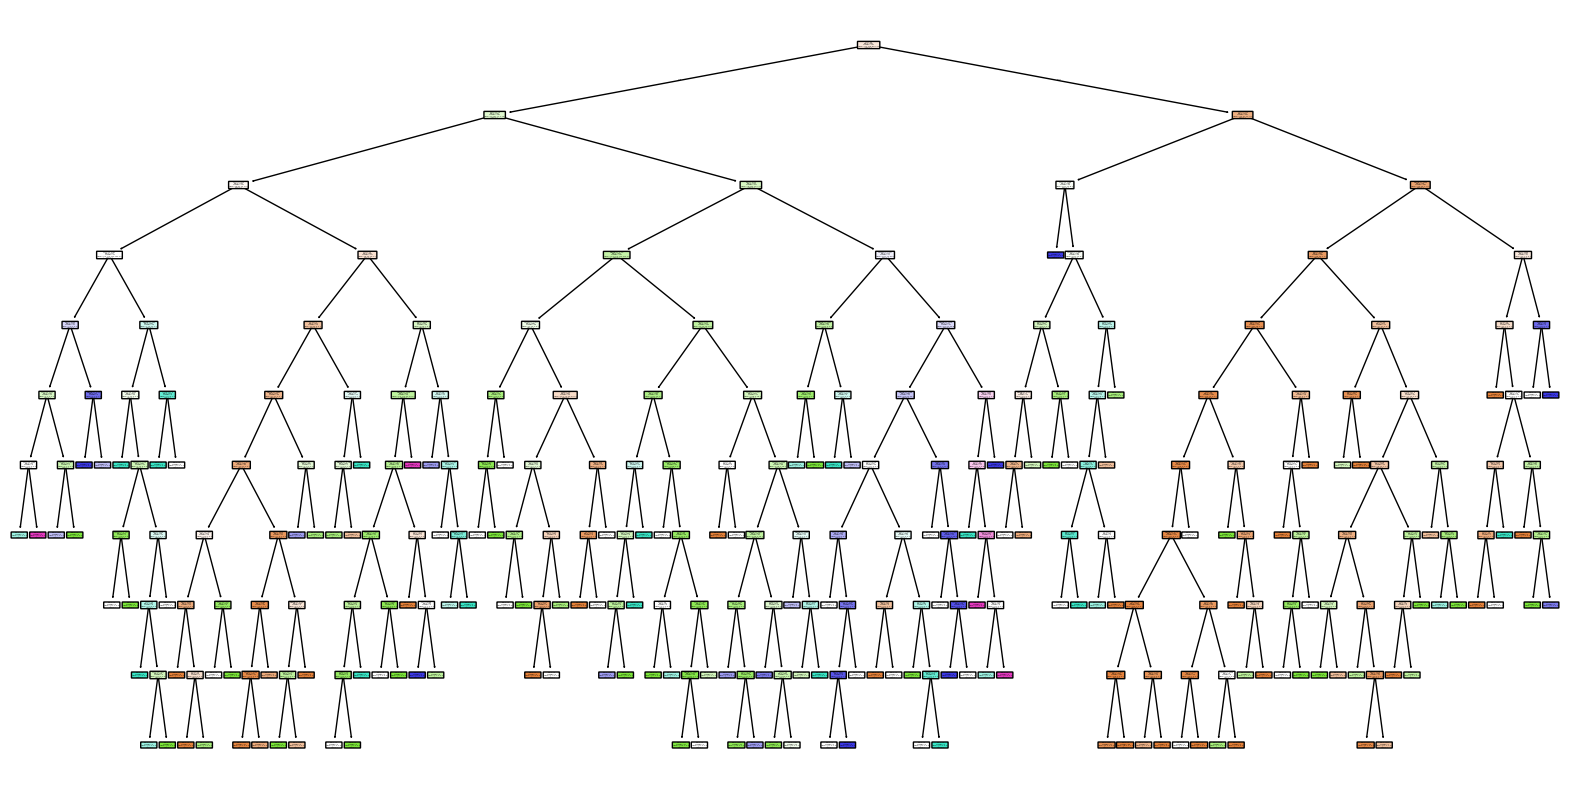

In [55]:
from sklearn.tree import plot_tree

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=y.unique().astype(str), filled=True, rounded=True)
plt.show()


##  Feature Importance


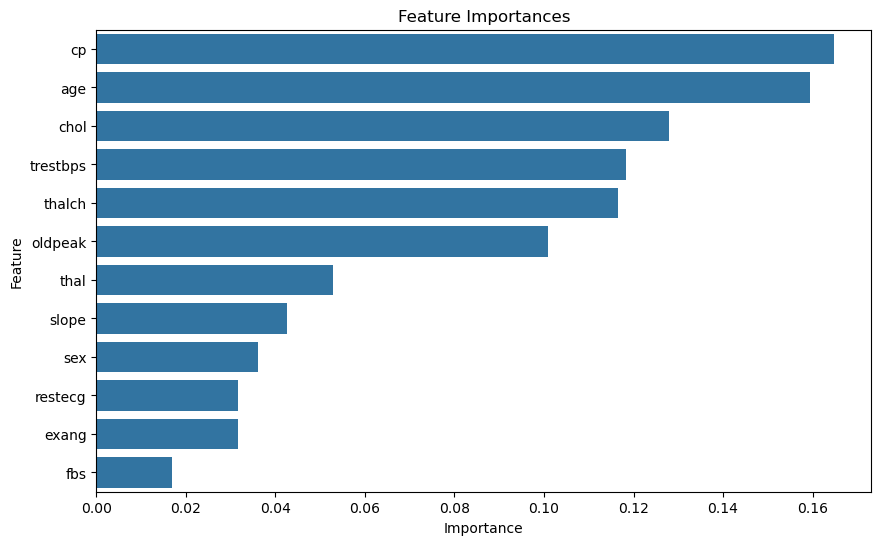

In [56]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


## Interview Question


### 1. Common Hyperparameters of Decision Tree Models and Their Impact

#### 2. Difference Between Label Encoding and One-Hot Encoding

In [57]:
## done
